<a href="https://colab.research.google.com/github/ActiveStacks/ExperimentTwo/blob/main/EXPERIMENT_CODEBERTLLM_2E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Qark_Processed.csv')
path3 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Combined_Processed.csv')

In [4]:
df = pd.read_csv(path3)

In [5]:

from sklearn.model_selection import train_test_split

In [6]:
df.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [7]:
df.dropna()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
90,90,file,WARNING,Logging found,"Log.w(""ListPreference"", ""Setting a summary wit...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", ""user_str"");"
145,145,file,WARNING,Logging found,"Log.w(c.b.a.a.e0.b.c, ""Use a non-transparent c...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.e0.b.c, ""user_str"");"
262,262,file,WARNING,Logging found,"Log.w(""ACTVAutoSizeHelper"", var3.toString(), v...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var3.toString(), var6);"
1083,1083,file,WARNING,Logging found,"Log.w(""ConstraintSet"", var83.toString());",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var83.toString());"
2623,2623,file,WARNING,Logging found,"Log.w(c.b.a.a.g0.g.z, ""Compatibility shadow re...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.g0.g.z, ""user_str"");"
...,...,...,...,...,...,...,...,...,...
8824647,15287772,webview,WARNING,Javascript enabled in Webview,radarWebView.getSettings().setJavaScriptEnable...,CWE-939,Improper Authorization in Handler for Custom U...,1,radarWebView.getSettings().setJavaScriptEnable...
8824654,15287780,webview,WARNING,BaseURL set for Webview,"radarWebView.loadDataWithBaseURL(null, display...",CWE-939,Improper Authorization in Handler for Custom U...,1,"radarWebView.loadDataWithBaseURL(null, display..."
8824679,15287809,webview,WARNING,BaseURL set for Webview,"radarWebView.loadDataWithBaseURL(null, display...",CWE-939,Improper Authorization in Handler for Custom U...,1,"radarWebView.loadDataWithBaseURL(null, display..."
8824705,15287838,webview,WARNING,BaseURL set for Webview,"radarWebView.loadDataWithBaseURL(null, display...",CWE-939,Improper Authorization in Handler for Custom U...,1,"radarWebView.loadDataWithBaseURL(null, display..."


In [8]:
df.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [9]:
df.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
8824982,15288184,NaN,NaN,NaN,public static ArrayList<WeatherStation> fromJs...,NaN,NaN,0,public static ArrayList<WeatherStation> fromJs...
8824983,15288185,NaN,NaN,NaN,ArrayList<WeatherStation> weatherStations = ne...,NaN,NaN,0,ArrayList<WeatherStation> weatherStations = ne...
8824984,15288186,NaN,NaN,NaN,for (int i = 0; i < jsonObjects.length(); i++) {,NaN,NaN,0,for (int i = 0; i < jsonObjects.length(); i++) {
8824985,15288187,NaN,NaN,NaN,weatherStations.add(new WeatherStation(jsonObj...,NaN,NaN,0,weatherStations.add(new WeatherStation(jsonObj...
8824986,15288188,NaN,NaN,NaN,return weatherStations;,NaN,NaN,0,return weatherStations;


In [10]:
df.shape

(8824987, 9)

In [11]:
df.describe()

,index,Vulnerability_status
count,8.824987e+06,8.824987e+06
mean,6.621323e+06,8.048397e-03
std,4.506012e+06,8.935111e-02
min,0.000000e+00,0.000000e+00
25%,2.619796e+06,0.000000e+00
50%,6.224498e+06,0.000000e+00
75%,1.022366e+07,0.000000e+00
max,1.528819e+07,1.000000e+00


In [12]:
df.columns

Index(['index', 'category', 'Severity', 'Description', 'Code', 'CWE_ID',
       'CWE_Desc', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [13]:
df.nunique()

,0
index,8824987
category,5
Severity,3
Description,29
Code,8766824
CWE_ID,14
CWE_Desc,14
Vulnerability_status,2
processed_code,8761980


In [14]:
df['Vulnerability_status'].unique()

array([0, 1])

In [15]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    8753960
1      71027
Name: count, dtype: int64


In [16]:
df_safe = df[df['Vulnerability_status']==0]

In [17]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [18]:
df_safe.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [19]:
df_safe.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
8824982,15288184,NaN,NaN,NaN,public static ArrayList<WeatherStation> fromJs...,NaN,NaN,0,public static ArrayList<WeatherStation> fromJs...
8824983,15288185,NaN,NaN,NaN,ArrayList<WeatherStation> weatherStations = ne...,NaN,NaN,0,ArrayList<WeatherStation> weatherStations = ne...
8824984,15288186,NaN,NaN,NaN,for (int i = 0; i < jsonObjects.length(); i++) {,NaN,NaN,0,for (int i = 0; i < jsonObjects.length(); i++) {
8824985,15288187,NaN,NaN,NaN,weatherStations.add(new WeatherStation(jsonObj...,NaN,NaN,0,weatherStations.add(new WeatherStation(jsonObj...
8824986,15288188,NaN,NaN,NaN,return weatherStations;,NaN,NaN,0,return weatherStations;


In [20]:
df_vulnerable.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
90,90,file,WARNING,Logging found,"Log.w(""ListPreference"", ""Setting a summary wit...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", ""user_str"");"
145,145,file,WARNING,Logging found,"Log.w(c.b.a.a.e0.b.c, ""Use a non-transparent c...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.e0.b.c, ""user_str"");"
262,262,file,WARNING,Logging found,"Log.w(""ACTVAutoSizeHelper"", var3.toString(), v...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var3.toString(), var6);"
1083,1083,file,WARNING,Logging found,"Log.w(""ConstraintSet"", var83.toString());",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var83.toString());"
2623,2623,file,WARNING,Logging found,"Log.w(c.b.a.a.g0.g.z, ""Compatibility shadow re...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.g0.g.z, ""user_str"");"


In [21]:
df_vulnerable.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
8824647,15287772,webview,WARNING,Javascript enabled in Webview,radarWebView.getSettings().setJavaScriptEnable...,CWE-939,Improper Authorization in Handler for Custom U...,1,radarWebView.getSettings().setJavaScriptEnable...
8824654,15287780,webview,WARNING,BaseURL set for Webview,"radarWebView.loadDataWithBaseURL(null, display...",CWE-939,Improper Authorization in Handler for Custom U...,1,"radarWebView.loadDataWithBaseURL(null, display..."
8824679,15287809,webview,WARNING,BaseURL set for Webview,"radarWebView.loadDataWithBaseURL(null, display...",CWE-939,Improper Authorization in Handler for Custom U...,1,"radarWebView.loadDataWithBaseURL(null, display..."
8824705,15287838,webview,WARNING,BaseURL set for Webview,"radarWebView.loadDataWithBaseURL(null, display...",CWE-939,Improper Authorization in Handler for Custom U...,1,"radarWebView.loadDataWithBaseURL(null, display..."
8824971,15288165,file,WARNING,Logging found,"Log.d(""nl.implode.weer"", object.getString(""nam...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(""user_str"", object.getString(""user_str""));"


In [22]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [23]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [24]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [25]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [26]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    71027
1    71027
Name: count, dtype: int64


In [27]:
print(df_balanced.value_counts())

index     category  Severity  Description    Code                                                                                                                                             CWE_ID   CWE_Desc                                          Vulnerability_status  processed_code                                                      
15288165  file      WARNING   Logging found  Log.d("nl.implode.weer", object.getString("name"));                                                                                              CWE-532  Insertion of Sensitive Information into Log File  1                     Log.d("user_str", object.getString("user_str"));                        1
90        file      WARNING   Logging found  Log.w("ListPreference", "Setting a summary with a String formatting marker is no longer supported. You should use a SummaryProvider instead.");  CWE-532  Insertion of Sensitive Information into Log File  1                     Log.w("user_str", "user_str");              

<Axes: >

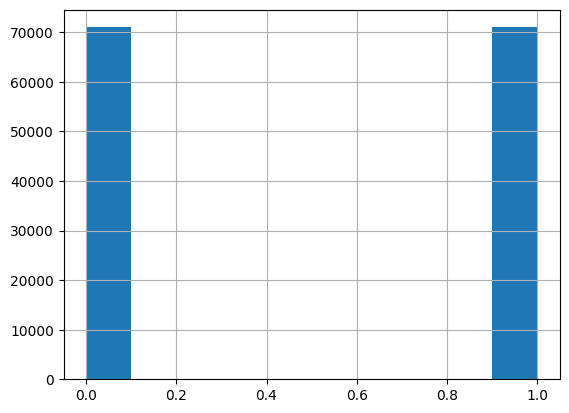

In [28]:
df_balanced['Vulnerability_status'].hist()

In [29]:
df_balanced.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,5701148,NaN,NaN,NaN,TypedArray var9 = this.getContext().obtainStyl...,NaN,NaN,0,TypedArray var9 = this.getContext().obtainStyl...
1,364607,NaN,NaN,NaN,if (!this.method_4002()) {,NaN,NaN,0,if (!this.method_4002()) {
2,3822836,NaN,NaN,NaN,builder.dateUpdated(new Date());,NaN,NaN,0,builder.dateUpdated(new Date());
3,14746365,file,INFO,Hardcoded HTTP url found,LASTFM(,CWE-312,Cleartext Storage of Sensitive Information,1,LASTFM(
4,1649892,file,WARNING,Insecure functions found,public /* varargs */ Result call(String string...,CWE-676,Use of Potentially Dangerous Function,1,"//user_comment Result call(String string2, Str..."


In [30]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [31]:
df_balanced.head(10)

,index,category,Vulnerability_status,processed_code
0,5701148,NaN,0,TypedArray var9 = this.getContext().obtainStyl...
1,364607,NaN,0,if (!this.method_4002()) {
2,3822836,NaN,0,builder.dateUpdated(new Date());
3,14746365,file,1,LASTFM(
4,1649892,file,1,"//user_comment Result call(String string2, Str..."
5,4589853,file,1,"Log.d(""user_str"", ""user_str"" + this.addUrl + ""..."
6,2689110,NaN,0,private static void sendBroadcast(final String...
7,1812192,file,1,"Log.d(""user_str"", var10 + ""user_str"");"
8,10264886,file,1,"Log.i(HistoryDatabaseManager.TAG, String.forma..."
9,2570843,NaN,0,"Float var31 = SVGParser.getFloatAttr(""user_str..."


In [32]:
df_balanced.tail(10)

,index,category,Vulnerability_status,processed_code
142044,8503355,file,1,"Log.i((String)""user_str"", (String)(""user_str"" ..."
142045,15152873,file,1,2F8D5;CJK COMPATIBILITY IDEOGRAPH-2F8D5;Lo;0;L...
142046,3149018,file,1,chipDrawable.d(b.getBoolean(b.b.a.a.l.Chip_clo...
142047,4837913,NaN,0,var15.append(this.field_675);
142048,15146287,file,1,2F96D;CJK COMPATIBILITY IDEOGRAPH-2F96D;Lo;0;L...
142049,4966590,webview,1,WebView var2 = this.field_239;
142050,1928486,file,1,"Log.e(field_4139, var4.toString());"
142051,12193244,NaN,0,manualWbCt.fireStringValueChanged(manualWbCt.g...
142052,7392408,NaN,0,"this.mRemote.transact(46, parcel2, parcel, 0);"
142053,6294765,NaN,0,if (this.method_10065() && this.isEnabled()) {


In [33]:
df_balanced.dropna()

,index,category,Vulnerability_status,processed_code
3,14746365,file,1,LASTFM(
4,1649892,file,1,"//user_comment Result call(String string2, Str..."
5,4589853,file,1,"Log.d(""user_str"", ""user_str"" + this.addUrl + ""..."
7,1812192,file,1,"Log.d(""user_str"", var10 + ""user_str"");"
8,10264886,file,1,"Log.i(HistoryDatabaseManager.TAG, String.forma..."
...,...,...,...,...
142045,15152873,file,1,2F8D5;CJK COMPATIBILITY IDEOGRAPH-2F8D5;Lo;0;L...
142046,3149018,file,1,chipDrawable.d(b.getBoolean(b.b.a.a.l.Chip_clo...
142048,15146287,file,1,2F96D;CJK COMPATIBILITY IDEOGRAPH-2F96D;Lo;0;L...
142049,4966590,webview,1,WebView var2 = this.field_239;


In [34]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [35]:
df_balanced.head()

,processed_code,Vulnerability_status
0,TypedArray var9 = this.getContext().obtainStyl...,0
1,if (!this.method_4002()) {,0
2,builder.dateUpdated(new Date());,0
3,LASTFM(,1
4,"//user_comment Result call(String string2, Str...",1


In [36]:
df_balanced.columns = ['text', 'labels']

In [37]:
df_balanced.head(5)

,text,labels
0,TypedArray var9 = this.getContext().obtainStyl...,0
1,if (!this.method_4002()) {,0
2,builder.dateUpdated(new Date());,0
3,LASTFM(,1
4,"//user_comment Result call(String string2, Str...",1


In [38]:
df_balanced.head(5)

,text,labels
0,TypedArray var9 = this.getContext().obtainStyl...,0
1,if (!this.method_4002()) {,0
2,builder.dateUpdated(new Date());,0
3,LASTFM(,1
4,"//user_comment Result call(String string2, Str...",1


In [39]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [40]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [41]:
from datasets import load_dataset

In [42]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [43]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 142054
    })
})

In [44]:
from posixpath import split
split_dataset = codes_dataset['train'].train_test_split(test_size=0.2)

In [45]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 113643
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 28411
    })
})

In [46]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [47]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [48]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [49]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/113643 [00:00<?, ? examples/s]

Map:   0%|          | 0/28411 [00:00<?, ? examples/s]

In [50]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
!pip install torchinfo

In [52]:
from torchinfo import summary

In [53]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [54]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [55]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc=np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'binary')
  return {'accuracy' : acc, 'f1':f1}

In [56]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['test'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-56-e5df01f81142>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [57]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.176200,0.175804,0.948400,0.948572
2,0.144500,0.161060,0.956953,0.956580
3,0.102400,0.156692,0.958960,0.958755


TrainOutput(global_step=21309, training_loss=0.15609853025659548, metrics={'train_runtime': 7363.7158, 'train_samples_per_second': 46.299, 'train_steps_per_second': 2.894, 'total_flos': 8.970218899282944e+16, 'train_loss': 0.15609853025659548, 'epoch': 3.0})